In [1]:
!pip install pandas
!pip install matplotlib seaborn
!pip install scipy
!pip install numpy
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d

import sys
import os

# Add parent directory to sys.path
sys.path.append(os.path.abspath('..'))



# Load your CSV
df = pd.read_csv("../GPU_DATA.csv")

# Axis Label
df["LABEL"] = df["YEAR"].astype(str) + " - " + df["GPU"]

# TDP per transistor
df["TDP_PER_TRANSISTOR"] = df["TDP_MAX"] / df["TRANSISTOR_COUNT"]


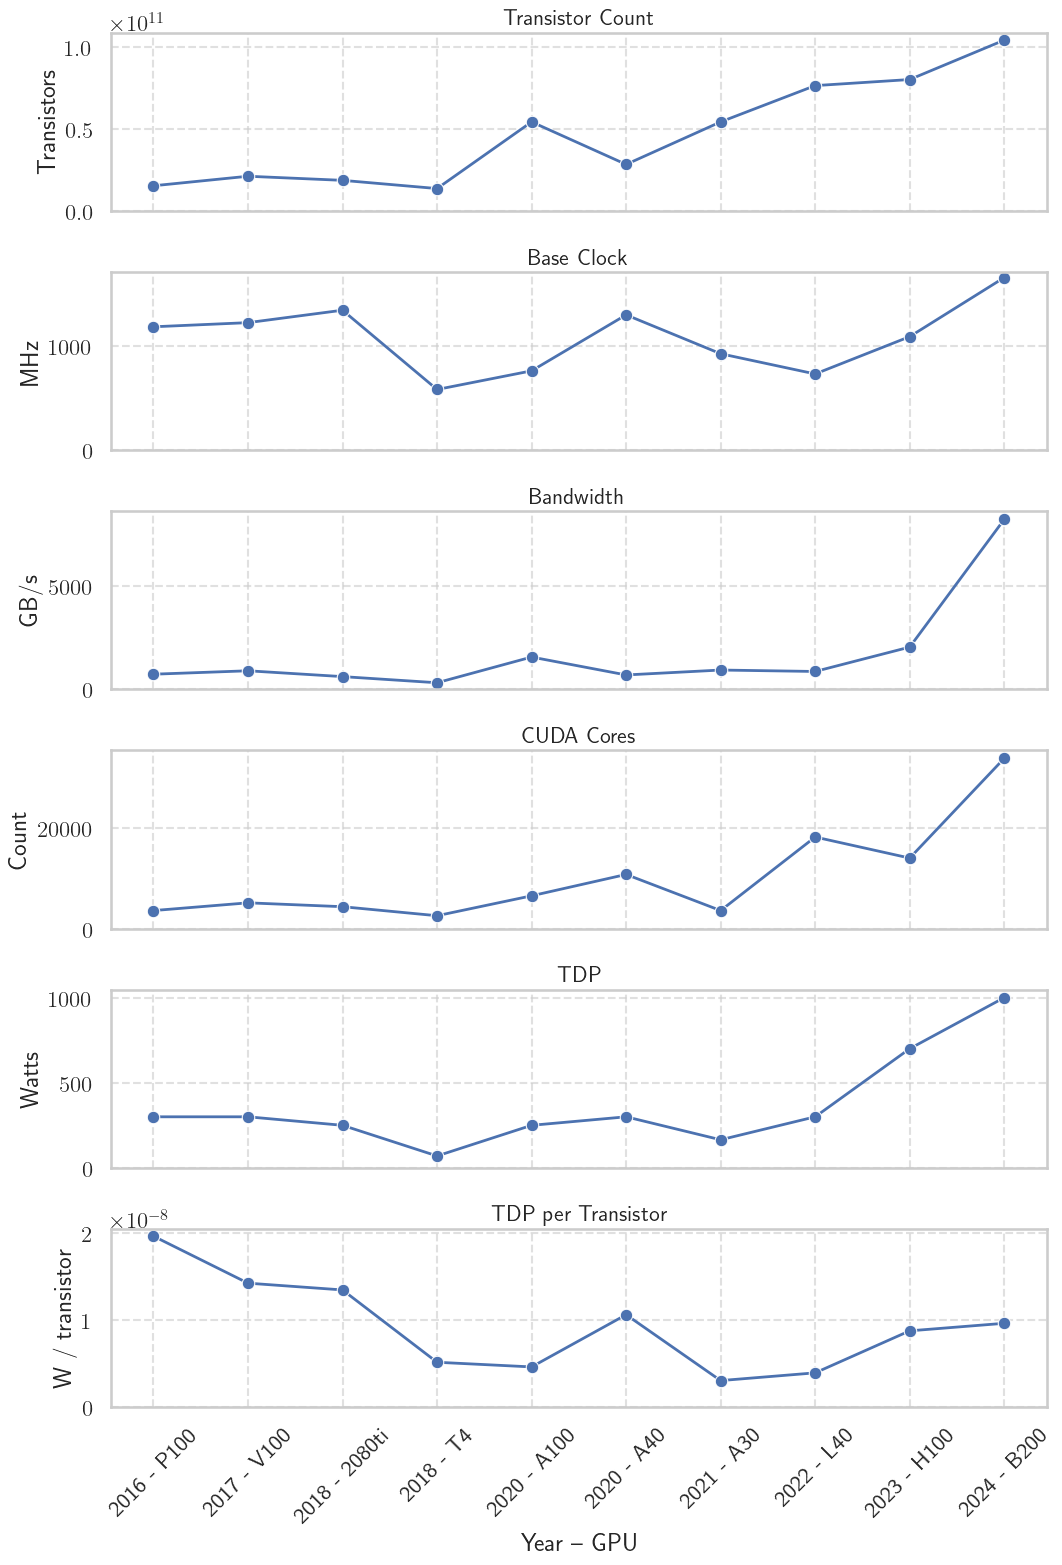

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by year
df_sorted = df.sort_values("YEAR")

# Set style
sns.set_theme(style="whitegrid", context="talk")

# Create figure with 6 stacked subplots
fig, axes = plt.subplots(6, 1, figsize=(11, 16), sharex=True)

# Define metrics and labels
metrics = [
    ("TRANSISTOR_COUNT", "Transistor Count", "Transistors"),
    ("BASE_CLOCK", "Base Clock", "MHz"),
    ("BANDWIDTH", "Bandwidth", "GB/s"),
    ("CUDA_CORES", "CUDA Cores", "Count"),
    ("TDP_MAX", "TDP", "Watts"),
    ("TDP_PER_TRANSISTOR", "TDP per Transistor", "W / transistor")
]

# Plot each metric
for ax, (col, title, ylabel) in zip(axes, metrics):
    sns.lineplot(
        data=df_sorted,
        x="LABEL", y=col,
        marker="o", linewidth=2,
        ax=ax, color="C0"
    )
    ax.set_title(title, fontsize=16, weight="bold")
    ax.set_ylabel(ylabel, fontsize=18)
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.set_ylim(bottom=0)

# Rotate x labels only once (last plot)
axes[-1].tick_params(axis='x', rotation=45)
axes[-1].set_xlabel("Year – GPU", fontsize=18)

# Remove redundant x-axis labels for top plots
for ax in axes[:-1]:
    ax.set_xlabel("")

plt.tight_layout(h_pad=1)
plt.savefig("gpu_trends.svg", bbox_inches='tight')
plt.show()



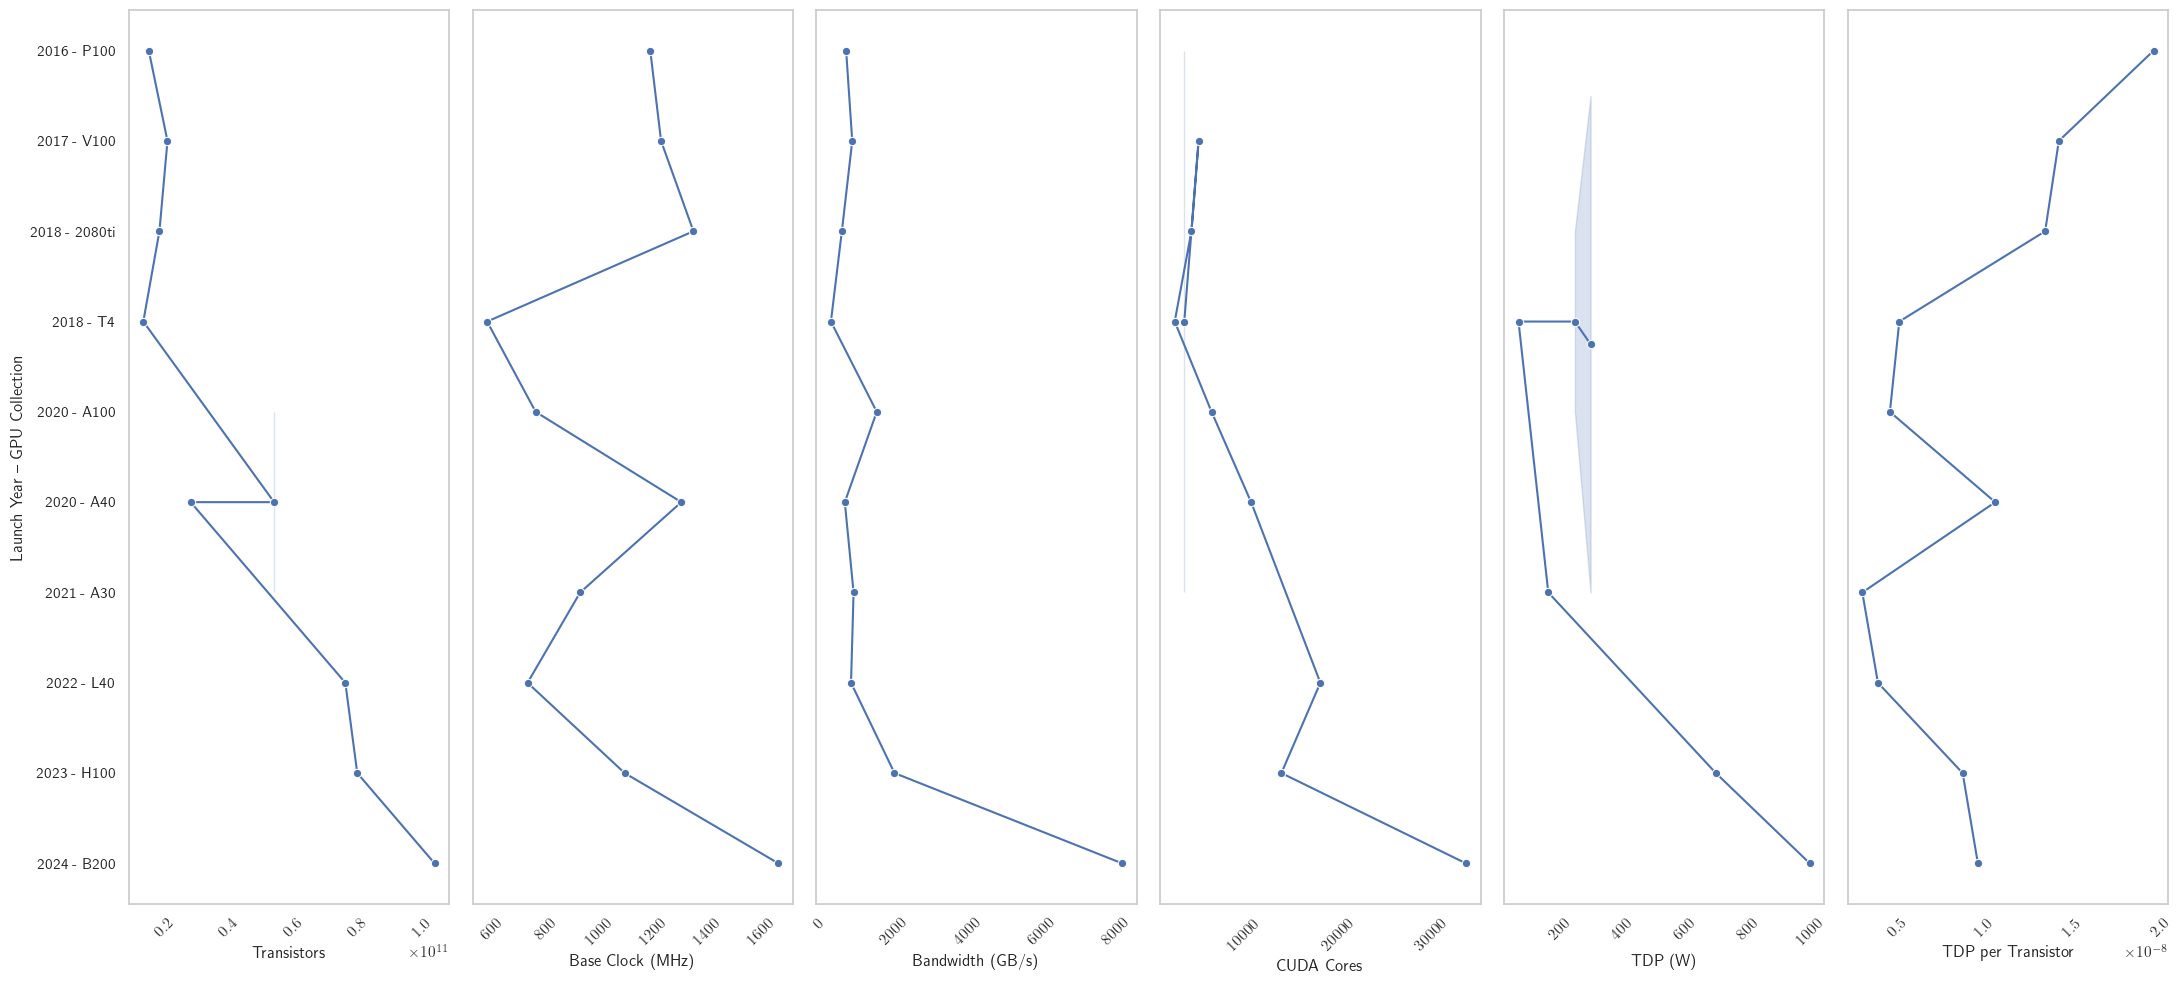

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by year
df_sorted = df.sort_values("YEAR")

# Set style
sns.set(style="whitegrid")

# Create figure with 6 subplots in 1 row
fig, axes = plt.subplots(1, 6, figsize=(22, 10), sharey=True)

# Define metrics and labels
metrics = [
    ("TRANSISTOR_COUNT", "Transistors"),
    ("BASE_CLOCK", "Base Clock (MHz)"),
    ("BANDWIDTH", "Bandwidth (GB/s)"),
    ("CUDA_CORES", "CUDA Cores"),
    ("TDP_MAX", "TDP (W)"),
    ("TDP_PER_TRANSISTOR", "TDP per Transistor")
]

# Plot each metric
for ax, (col, label) in zip(axes, metrics):
    sns.lineplot(
        data=df_sorted,
        x=col, y="LABEL", marker="o",
        ax=ax, sort=False
    )
    ax.set_xlabel(label)
    ax.set_ylabel("")
    ax.grid(False)

# Add shared y-label
axes[0].set_ylabel("Launch Year – GPU Collection")

# Rotate x labels for readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


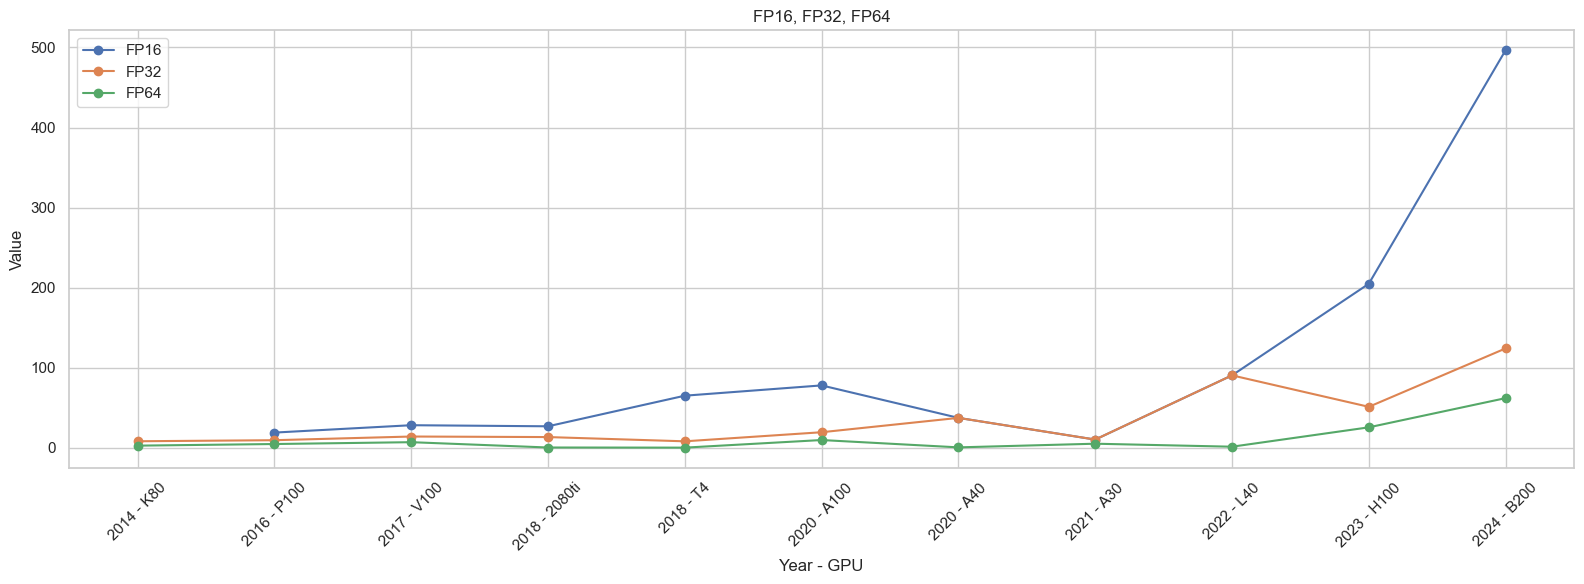

In [4]:
plt.figure(figsize=(16, 6))

# Plot each FP precision line
plt.plot(df_sorted["LABEL"], df_sorted["FP16"], marker='o', label="FP16")
plt.plot(df_sorted["LABEL"], df_sorted["FP32"], marker='o', label="FP32")
plt.plot(df_sorted["LABEL"], df_sorted["FP64"], marker='o', label="FP64")

plt.xticks(rotation=45)
plt.xlabel("Year - GPU")
plt.ylabel("Value")
plt.title("FP16, FP32, FP64")
plt.legend()
# plt.yscale('log')
plt.tight_layout()
plt.show()

In [5]:
# Calculates the speed of of each generation after the earliest year

for col in ["FP16", "FP32", "FP64"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df = df.dropna()

earliest_year = df["YEAR"].min()

for col in ["FP16", "FP32", "FP64"]:
    baseline = df.loc[df["YEAR"] == earliest_year, col].values[0]
    df[f"{col}_speedup"] = df[col] / baseline

# Calculate FP value per watt
for col in ["FP16", "FP32", "FP64"]:
    # per watt metric
    df[f"{col}_per_w"] = df[col] / df["TDP_MAX"]
    
    # baseline per watt at earliest year
    baseline_per_w = df.loc[df["YEAR"] == df["YEAR"].min(), f"{col}_per_w"].values[0]
    
    # improvement factor (speedup relative to baseline per watt)
    df[f"{col}_per_w_speedup"] = df[f"{col}_per_w"] / baseline_per_w


cols = ["GPU", "FP16", "FP32", "FP64", "TDP_MAX", "FP16_per_w_speedup", "FP32_per_w_speedup", "FP64_per_w"]
print(df[cols].to_string())

       GPU    FP16     FP32     FP64  TDP_MAX  FP16_per_w_speedup  FP32_per_w_speedup  FP64_per_w
0     H100  204.90   51.220  25.6100      700            4.609674            2.304370    0.036586
1     V100   28.26   14.130   7.0660      300            1.483465            1.483309    0.023553
2     A100   77.97   19.490   9.7460      250            4.911496            2.455175    0.038984
3     B200  496.60  124.160  62.0800     1000            7.820472            3.910141    0.062080
4      A40   37.42   37.420   0.5840      300            1.964304            3.928197    0.001947
5   2080ti   26.90   13.450   0.4202      250            1.694488            1.694310    0.001681
6     P100   19.05    9.526   4.7630      300            1.000000            1.000000    0.015877
8       T4   65.13    8.141   0.2544       70           14.652418            3.662608    0.003634
9      A30   10.32   10.320   5.1610      165            0.984968            1.969729    0.031279
10     L40   90.52  

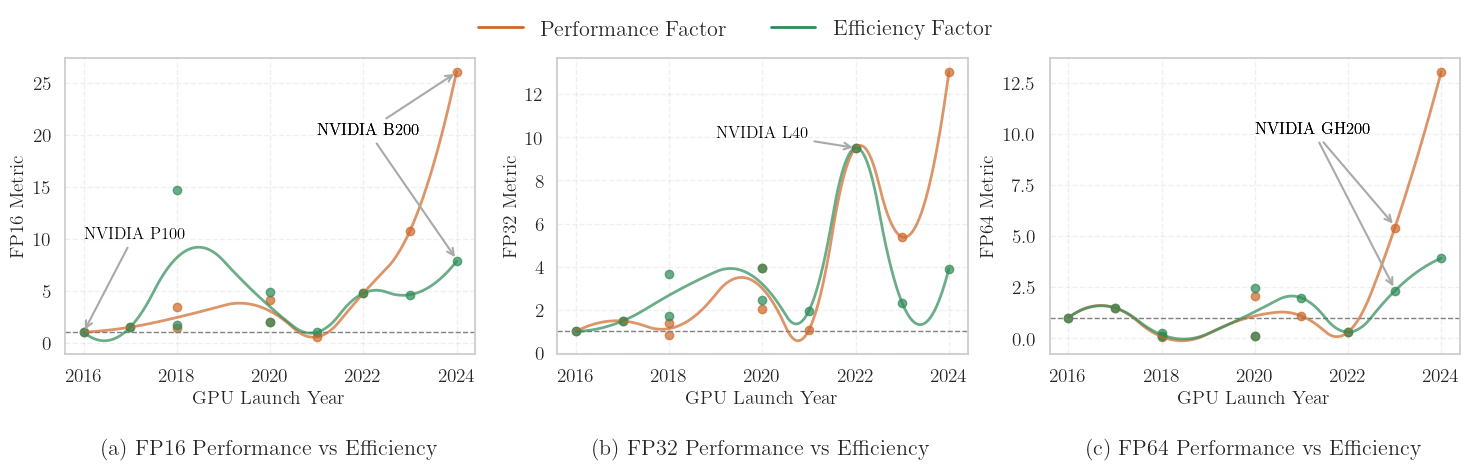

In [6]:
# Set LaTeX font globally
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14
})

colors = {
    "speedup": "#CE682A",
    "per_w_speedup": "#2E8B57"
}

labels = {
    "speedup": "Performance Factor",
    "per_w_speedup": "Efficiency Factor"
}

letters = ['a', 'b', 'c']

fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharey=False)


for i, col in enumerate(["FP16", "FP32", "FP64"]):
    ax = axes[i]
    ax.axhline(1, color="gray", linestyle="--", linewidth=1)
    
    for metric, color in colors.items():
        col_name = f"{col}_{metric}"
        
        # Scatter all data
        ax.scatter(df["YEAR"], df[col_name], color=color, alpha=0.7)
        
        # Average values for each year
        df_avg = df.groupby("YEAR")[col_name].mean().reset_index()
        
        # Smooth curve
        x_new = np.linspace(df_avg["YEAR"].min(), df_avg["YEAR"].max(), 1000)
        spline = interp1d(df_avg["YEAR"], df_avg[col_name], kind='quadratic')
        y_smooth = spline(x_new)
        
        ax.plot(x_new, y_smooth, color=color, linewidth=2, alpha=0.7)

    if i == 0:
        ax.annotate(
            "NVIDIA B200",        # Text to show
            xy=(2024, 26),             # Point to annotate (x, y)
            xytext=(2021, 20),         # Position of the text
            arrowprops=dict(arrowstyle="->", color='darkgray', lw=1.5),
            fontsize=12,
            color='black'
        )
        ax.annotate(
            "NVIDIA B200",        # Text to show
            xy=(2024, 8),             # Point to annotate (x, y)
            xytext=(2021, 20),         # Position of the text
            arrowprops=dict(arrowstyle="->", color='darkgray', lw=1.5),
            fontsize=12,
            color='black'
        ) 
        ax.annotate(
            "NVIDIA P100",        # Text to show
            xy=(2016, 1),             # Point to annotate (x, y)
            xytext=(2016, 10),         # Position of the text
            arrowprops=dict(arrowstyle="->", color='darkgray', lw=1.5),
            fontsize=12,
            color='black'
        )
        
    if i == 1:
        ax.annotate(
            "NVIDIA L40",        # Text to show
            xy=(2022, 9.5),             # Point to annotate (x, y)
            xytext=(2019, 10),         # Position of the text
            arrowprops=dict(arrowstyle="->", color='darkgray', lw=1.5),
            fontsize=12,
            color='black'
        )
    
    if i == 2:
        ax.annotate(
            "NVIDIA GH200",        # Text to show
            xy=(2023, 2.4),             # Point to annotate (x, y)
            xytext=(2020, 10),         # Position of the text
            arrowprops=dict(arrowstyle="->", color='darkgray', lw=1.5),
            fontsize=12,
            color='black'
        )

        ax.annotate(
            "NVIDIA GH200",        # Text to show
            xy=(2023, 5.5),             # Point to annotate (x, y)
            xytext=(2020, 10),         # Position of the text
            arrowprops=dict(arrowstyle="->", color='darkgray', lw=1.5),
            fontsize=12,
            color='black'
        )

    ax.set_xlabel("GPU Launch Year")  # title at bottom
    #ax.set_xlabel(f"({letters[i]}) {col} Performance vs Efficiency")  # title at bottom
    ax.set_ylabel(f"{col} Metric")
    
    # Lighter grid lines
    ax.grid(True, linestyle='--', alpha=0.3)

    ax.text(
        0.5, -0.32,                 # x in axes fraction, y below axis
        f"({letters[i]}) {col} Performance vs Efficiency",
        ha='center', va='center', transform=ax.transAxes,
        fontsize=16
    )

# Combined legend at the top
handles = [plt.Line2D([0], [0], color=color, lw=2) for color in colors.values()]
fig.legend(handles, labels.values(), loc='upper center', ncol=len(labels), frameon=False, fontsize=16)

plt.subplots_adjust(top=0.85, wspace=0.2, hspace=0.3)  # top moves legend away, wspace moves subplots apart

plt.savefig("fp_over_time_all.svg", bbox_inches='tight')
plt.show()

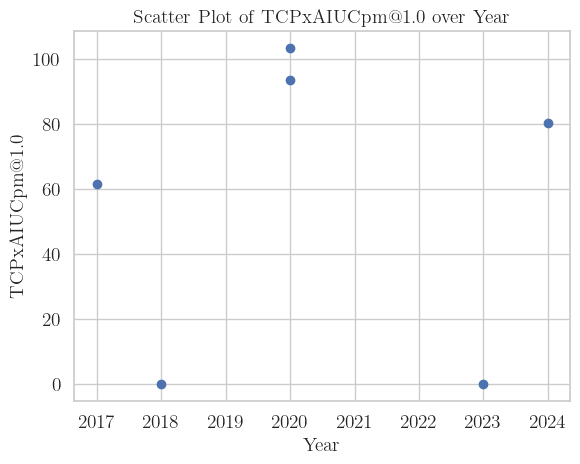

In [7]:
df_HPI = df[df["HPI_AVAILABLE"] != 0]

plt.scatter(df_HPI["YEAR"], df_HPI["TCPxAIUCpm@10.0"], marker="o")

# Labels and title
plt.xlabel("Year")
plt.ylabel("TCPxAIUCpm@1.0")
plt.title("Scatter Plot of TCPxAIUCpm@1.0 over Year")

plt.show()

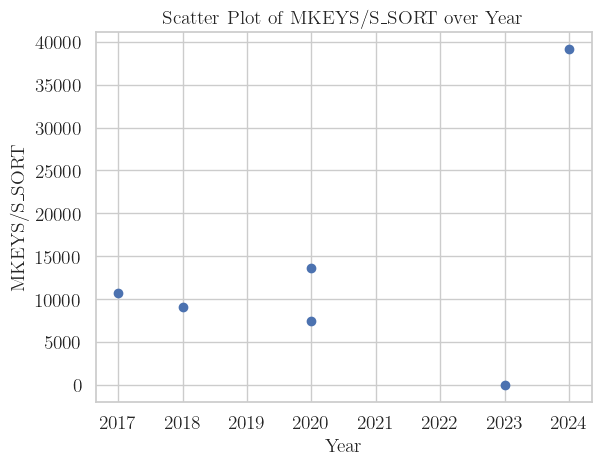

In [8]:

plt.scatter(df_HPI["YEAR"], df_HPI["MKEYS/S_SORT"], marker="o")

# Labels and title
plt.xlabel("Year")
plt.ylabel("MKEYS/S_SORT")
plt.title("Scatter Plot of MKEYS/S_SORT over Year")

plt.show()

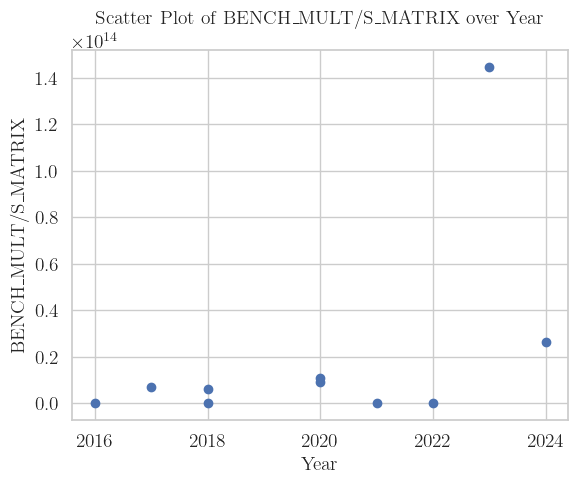

In [9]:

plt.scatter(df["YEAR"], df["BENCH_MULT/S_MATRIX"], marker="o")

# Labels and title
plt.xlabel("Year")
plt.ylabel("BENCH_MULT/S_MATRIX")
plt.title("Scatter Plot of BENCH_MULT/S_MATRIX over Year")

plt.show()

In [10]:
from lifecycle.compare import compare_gpus, calculate_intersect, float_to_days
import lifecycle.constants as constants

def safe_intersect_to_days(old_opex, new_opex):
    intersect = calculate_intersect(old_opex, new_opex)

    if not intersect:  # handles False, None, empty tuple
        return None  

    year_fraction = intersect[0]  # first element of tuple

    if year_fraction < 0:
        return None

    return float_to_days(year_fraction)

(np.float64(-0.6265387775804443), np.float64(-30.103935185185186))


/Users/mbaeuerl/coding/sdm-project-sose25/lifecycle/compare.py:151: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = [new_opex / old_opex for new_opex, old_opex in zip(new_system_opex, old_system_opex)]


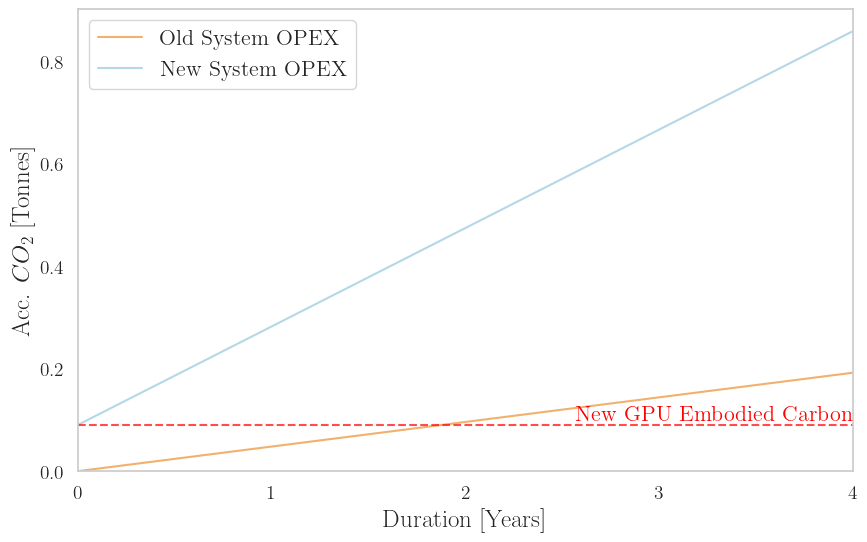

In [11]:
from matplotlib.ticker import MaxNLocator

# SCALING = constants.SCALING_EMISSIONS
# NAME = 'SCALING_EMISSIONS'

SCALING = constants.SCALING_NONE
NAME = 'SCALING_NONE'

comparison = compare_gpus(df, "A100", "B200", constants.FP64, "Sweden", 100, 100, SCALING)

TIME = 5

# Convert from kg → tonnes
old_opex = [v / 1000 for v in comparison.get("oldSystemOpex")][:TIME]
new_opex = [v / 1000 for v in comparison.get("newSystemOpex")][:TIME]

# Intersection (in days → years)
intersect = calculate_intersect(comparison.get("oldSystemOpex"), comparison.get("newSystemOpex"))
intersect_days = safe_intersect_to_days(comparison.get("oldSystemOpex"), comparison.get("newSystemOpex")) 

print(intersect)

if intersect_days is not None:
    x_intersect, y_intersect = intersect
    y_intersect /= 1000  # kg → tonnes


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 18,
    "axes.titlesize": 14,
    "legend.fontsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14
})

plt.figure(figsize=(10, 6))  # 10 inches wide, 6 inches tall
# Plot OPEX lines
plt.plot(old_opex, label="Old System OPEX", color="#F1B16E")
plt.plot(new_opex, label="New System OPEX", color="#B4D8E7")

# Force axis to start at (0,0)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlim(right=TIME-1)

# Add horizontal line for embodied carbon (y-intercept of new GPU curve)
embodied_carbon = new_opex[0]
plt.axhline(embodied_carbon, color="red", linestyle="--", alpha=0.7)
plt.text(
    len(new_opex) - 1, embodied_carbon, 
    "New GPU Embodied Carbon", 
    color="red", 
    va="bottom", ha="right", fontsize=16
)

# Add intersection marker + label
if intersect_days is not None:
    plt.scatter(x_intersect, y_intersect, color="red", zorder=5, s=50)
    plt.annotate(
        f"{intersect_days:.0f} Days Until Break-Even",
        xy=(x_intersect, y_intersect),
        xytext=(100, 10),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->", color="red"),
        fontsize=16,
        color="red",
    )

# Labels and formatting
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Duration [Years]")
plt.ylabel("Acc. $CO_2$ [Tonnes]")
plt.legend()
plt.grid(False)

plt.savefig(f"comparison_{NAME}.svg", bbox_inches='tight')
plt.show()

In [12]:
import matplotlib.pyplot as plt

def gpu_intersections(df, country, workload, utilization, scaling):
    """
    Calculate intersections between each GPU in df and the next two GPUs.

    Parameters:
        df (pd.DataFrame): GPU data with columns ["GPU", "Year"].
        country (str): Country for compare_gpus.
        workload (int/float): Workload parameter.
        hours (int/float): Usage hours parameter.
        advanced (bool): Whether to enable advanced mode.
        days_in_year (int): Days per year.

    Returns:
        list of tuples: [(gpu1, gpu2, year1, days), ...]
    """
    results = []
    gpus = (
        df.loc[(df[workload] != 0) | (df[workload].isna()), ["GPU", "YEAR"]]
        .sort_values("YEAR")
        .values
        .tolist()
    )

   
    for i in range(len(gpus) - 1):
        gpu1, year1 = gpus[i]

        for j in range(i + 1, min(i + 3, len(gpus))):
            gpu2, _ = gpus[j]

            comparison = compare_gpus(df, gpu1, gpu2, workload, country, utilization, utilization, scaling)

            days = safe_intersect_to_days(
                comparison.get("oldSystemOpex"),
                comparison.get("newSystemOpex")
            )

            results.append((gpu1, gpu2, year1, days))

    return results


def plot_intersections(country_intersections, colors, workload_file_name, country_to_label):
    plt.figure(figsize=(10, 6))

    
    country_handles = []  # Store legend handles
    country_labels = []   # Store corresponding labels

    for idx, (country, intersections) in enumerate(country_intersections.items()):
        intersections_no_none = [(g1, g2, year1, days) for g1, g2, year1, days in intersections if days is not None]
        intersections_none = [(g1, g2, year1, days) for g1, g2, year1, days in intersections if days is None]

        x = [year1 for _, _, year1, _ in intersections_no_none]
        y = [days for _, _, _, days in intersections_no_none]
        labels = [f"{g1} vs {g2}" for g1, g2, _, _ in intersections_no_none]

        color = colors[idx % len(colors)]
        sc = plt.scatter(x, y, marker='o', color=color)
        country_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=country,
                                          markerfacecolor=color, markersize=8))
        country_labels.append(country)

        if country == country_to_label:
            for i, label in enumerate(labels):
                plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(7, 0), ha='left', va='center', color=color)

            max_days = max((d for _, _, _, d in intersections if d is not None), default=1)
            y_max = 1
            x_years = sorted(set(year for _, _, year, _ in intersections_none))

            labels_per_year = {}
            for year in x_years:
                comps = [f"{g1} vs {g2}" for g1, g2, y, _ in intersections_none if y == year]
                labels_per_year[year] = "\n".join(comps)

            for year in x_years:
                plt.scatter(year, y_max, marker='x', color='red')
                plt.annotate(
                    labels_per_year[year],
                    xy=(year, y_max),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center',
                    va='bottom',
                    color='red',
                    clip_on=True
                )

    # Add "no breakeven" legend manually
    no_break_leg = plt.Line2D([0], [0], marker='x', color='red', linestyle='None', label='No breakeven', markersize=8)
    country_handles.append(no_break_leg)
    country_labels.append('No breakeven')

    # Horizontal reference lines
    for days, label in [
        (365 / 2, "6 months"),
        (365, "1 year"),
        (365 * 3, "3 years")
    ]:
        plt.axhline(y=days, color='red', linestyle='--', linewidth=1, alpha=0.3)
        plt.text(
            2024,
            days,
            label,
            va='top',
            ha='right',
            color='red',
            alpha=0.9,
            fontsize=11
        )

    plt.xlabel("Current GPU Release Year")
    plt.ylabel("Days until Breakeven")
    plt.xlim(2016.8, 2024)
    plt.grid(False)
    plt.yscale("log")

    # Combined legend at the top
    plt.legend(
        handles=country_handles,
        labels=country_labels,
        loc='upper center',
        bbox_to_anchor=(0.5, 1.15),  # Adjust vertical position
        ncol=len(country_labels),
        frameon=True,
    )

    plt.savefig(f"breakeven_{workload_file_name}.svg", bbox_inches='tight')
    plt.show()


/Users/mbaeuerl/coding/sdm-project-sose25/lifecycle/compare.py:151: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = [new_opex / old_opex for new_opex, old_opex in zip(new_system_opex, old_system_opex)]
/Users/mbaeuerl/coding/sdm-project-sose25/lifecycle/compare.py:151: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = [new_opex / old_opex for new_opex, old_opex in zip(new_system_opex, old_system_opex)]
/Users/mbaeuerl/coding/sdm-project-sose25/lifecycle/compare.py:151: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = [new_opex / old_opex for new_opex, old_opex in zip(new_system_opex, old_system_opex)]


Plotting workload: FP16


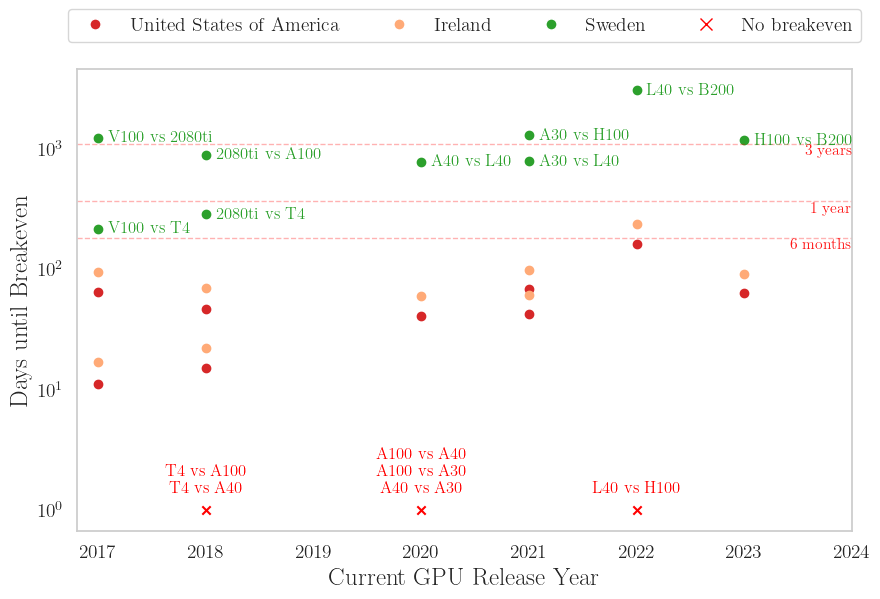

/Users/mbaeuerl/coding/sdm-project-sose25/lifecycle/compare.py:151: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = [new_opex / old_opex for new_opex, old_opex in zip(new_system_opex, old_system_opex)]
/Users/mbaeuerl/coding/sdm-project-sose25/lifecycle/compare.py:151: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = [new_opex / old_opex for new_opex, old_opex in zip(new_system_opex, old_system_opex)]
/Users/mbaeuerl/coding/sdm-project-sose25/lifecycle/compare.py:151: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = [new_opex / old_opex for new_opex, old_opex in zip(new_system_opex, old_system_opex)]


Plotting workload: MMULT


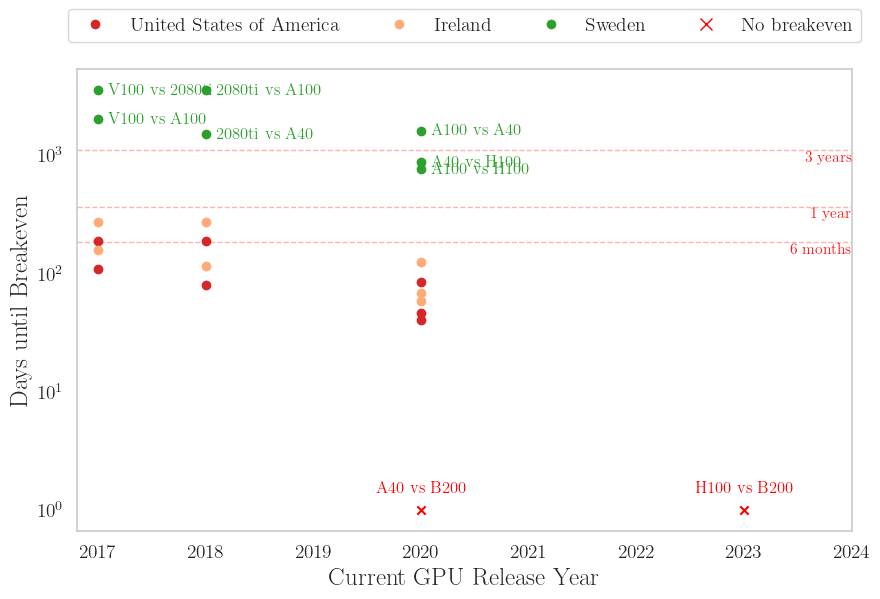

/Users/mbaeuerl/coding/sdm-project-sose25/lifecycle/compare.py:151: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = [new_opex / old_opex for new_opex, old_opex in zip(new_system_opex, old_system_opex)]
/Users/mbaeuerl/coding/sdm-project-sose25/lifecycle/compare.py:151: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = [new_opex / old_opex for new_opex, old_opex in zip(new_system_opex, old_system_opex)]
/Users/mbaeuerl/coding/sdm-project-sose25/lifecycle/compare.py:151: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = [new_opex / old_opex for new_opex, old_opex in zip(new_system_opex, old_system_opex)]


Plotting workload: SORTING


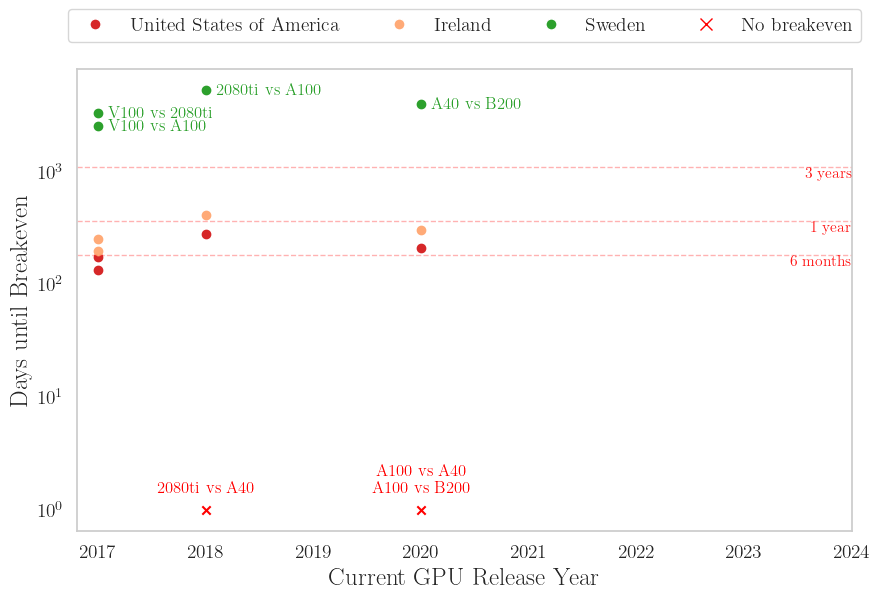

/Users/mbaeuerl/coding/sdm-project-sose25/lifecycle/compare.py:151: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = [new_opex / old_opex for new_opex, old_opex in zip(new_system_opex, old_system_opex)]
/Users/mbaeuerl/coding/sdm-project-sose25/lifecycle/compare.py:151: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = [new_opex / old_opex for new_opex, old_opex in zip(new_system_opex, old_system_opex)]
/Users/mbaeuerl/coding/sdm-project-sose25/lifecycle/compare.py:151: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = [new_opex / old_opex for new_opex, old_opex in zip(new_system_opex, old_system_opex)]


Plotting workload: TPCXAI


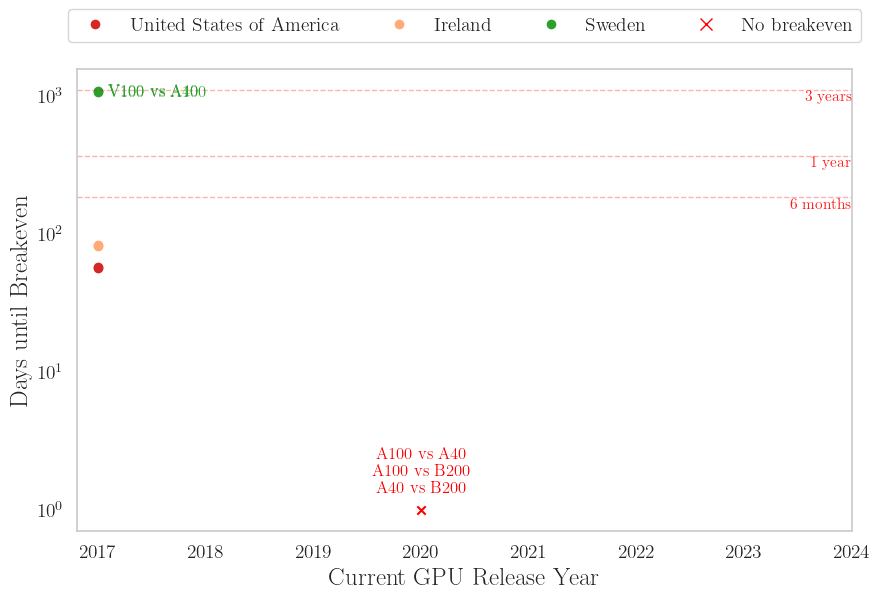

In [13]:
from lifecycle.constants import FP16, MMULT, SORTING, TPCXAI, SCALING_EMISSIONS, SCALING_NONE, SCALING_UTILIZATION
from lifecycle.compare import compare_gpus

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 18,
    "axes.titlesize": 14,
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14
})

# List of workloads you want to plot
workloads = [FP16, MMULT, SORTING, TPCXAI]  # replace/add your actual workload variables
workloads_name = ["FP16", "MMULT", "SORTING", "TPCXAI"]  # replace/add your actual workload variables

# List of countries to include
countries = ["United States of America", "Ireland", "Sweden"]
colors = ["tab:red", "#FFAA77", "tab:green"]  # Extend if needed
country_to_label = "Sweden"

for workload, workload_name in zip(workloads, workloads_name):
    country_intersections = {}

    for country in countries:
        intersections = gpu_intersections(df, country, workload, 40, scaling=SCALING_UTILIZATION)
        country_intersections[country] = intersections

    print(f"Plotting workload: {workload_name}")
    plot_intersections(country_intersections, colors, "multiple_" + workload_name, country_to_label)

/Users/mbaeuerl/coding/sdm-project-sose25/lifecycle/compare.py:151: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = [new_opex / old_opex for new_opex, old_opex in zip(new_system_opex, old_system_opex)]


Plotting workload: FP16


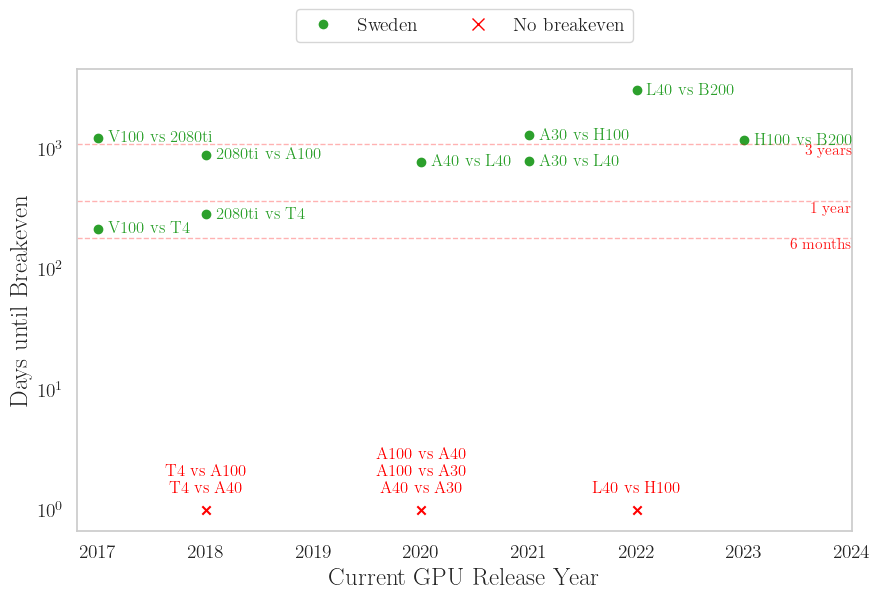

/Users/mbaeuerl/coding/sdm-project-sose25/lifecycle/compare.py:151: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = [new_opex / old_opex for new_opex, old_opex in zip(new_system_opex, old_system_opex)]


Plotting workload: MMULT


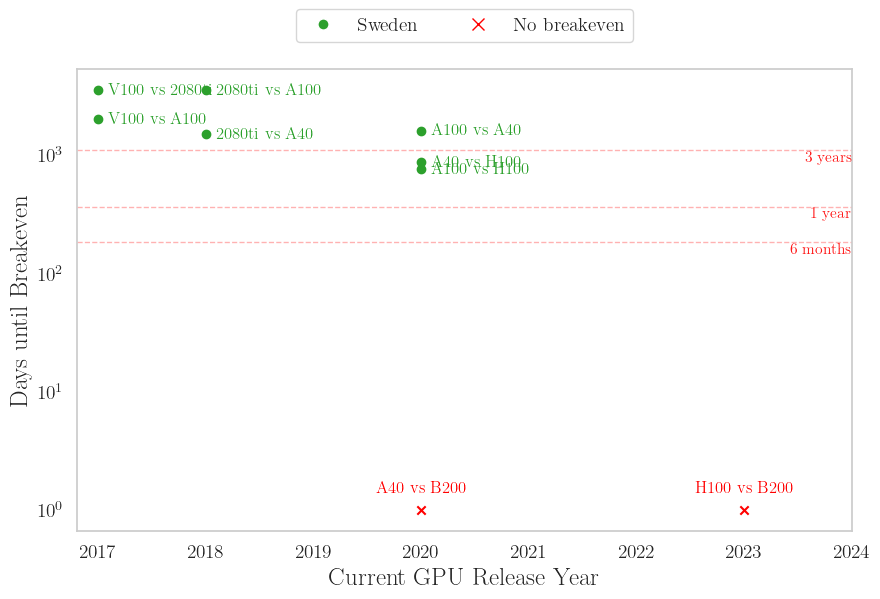

/Users/mbaeuerl/coding/sdm-project-sose25/lifecycle/compare.py:151: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = [new_opex / old_opex for new_opex, old_opex in zip(new_system_opex, old_system_opex)]


Plotting workload: SORTING


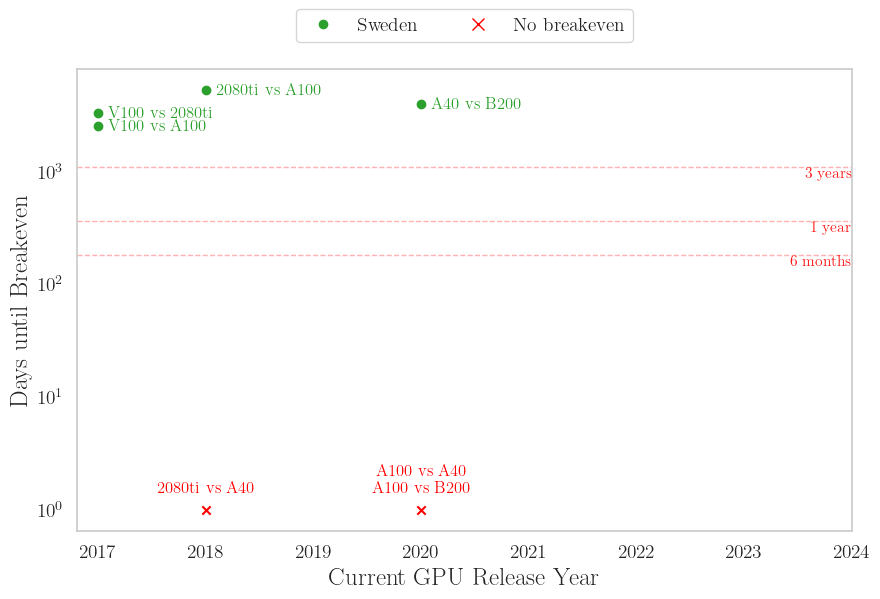

/Users/mbaeuerl/coding/sdm-project-sose25/lifecycle/compare.py:151: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = [new_opex / old_opex for new_opex, old_opex in zip(new_system_opex, old_system_opex)]


Plotting workload: TPCXAI


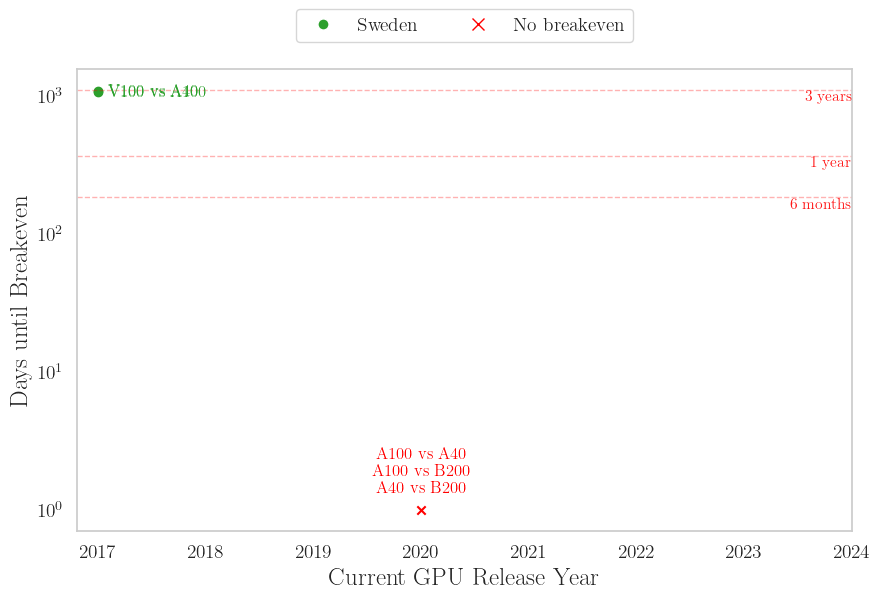

In [14]:
from lifecycle.constants import FP16, MMULT, SORTING, TPCXAI, SCALING_EMISSIONS, SCALING_NONE, SCALING_UTILIZATION
from lifecycle.compare import compare_gpus

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 18,
    "axes.titlesize": 14,
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14
})

# List of workloads you want to plot
workloads = [FP16, MMULT, SORTING, TPCXAI]  # replace/add your actual workload variables
workloads_name = ["FP16", "MMULT", "SORTING", "TPCXAI"]  # replace/add your actual workload variables

# List of countries to include
countries = ["Sweden"]
colors = ["tab:green"]  # Extend if needed
country_to_label = "Sweden"

for workload, workload_name in zip(workloads, workloads_name):
    country_intersections = {}

    for country in countries:
        intersections = gpu_intersections(df, country, workload, 40, scaling=SCALING_UTILIZATION)
        country_intersections[country] = intersections

    print(f"Plotting workload: {workload_name}")
    plot_intersections(country_intersections, colors, "single_" + workload_name, country_to_label)